# The phyloseq package

Phyloseq is a package made for organizing and working with microbiome data in R. With the phyloseq package we can have all our microbiome amplicon sequence data in a single R object. With functions from the phyloseq package, most common operations for preparing data for analysis is possible with few simple commands.

This document is an overview on how phyloseq objects are organized and how they can be accessed.

The paper presenting phyloseq:
https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0061217

A comprehensive documetation of the phyloseq package:
https://joey711.github.io/phyloseq/

To work with phyloseq objects we first have to load the package

In [1]:
library(phyloseq)

# Contents
* [The phyloseq object](#obj)
* [OTU table](#otu)
* [Sample data](#samp)
* [Taxonomy table](#tax)
* [Phylogenetic tree](#tree)
* [Reference sequences](#seq)

# The phyloseq object<a class="anchor" id="obj"></a>

Let's load our test dataset, and see how phyloseq is organized. 

In [2]:
load("../data/physeq.RData")

If we print the name of the phyloseq object, we can see what it contains

In [3]:
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1310 taxa and 150 samples ]
sample_data() Sample Data:       [ 150 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 1310 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1310 tips and 1309 internal nodes ]
refseq()      DNAStringSet:      [ 1310 reference sequences ]

The *phy* object contains all our data and associated metadata. This is organized in 5 different sub-objects:
* **otu_table:** Contains a matrix with the abundance of each taxa (ASV) for each sample
* **sample_data:** Contains the metadata for each sample
* **tax_table:** Contains the taxonomical annotation for each taxon (ASV)
* **phy_tree:** Contains a phylogenetic tree
* **refseq:** Contains sequences (16S rRNA gene sequence) for each taxon (ASV)

*Note:* "*phy*" is an arbitrary name, it could be anything else

Below is a section on each of the objects describing what they contain and how to access them.

## otu_table<a class="anchor" id="otu"></a>
The otu_table contains the abundance of each OTU/ASV for each sample. We can see from above that it contains data for 1310 taxa and 150 samples. We can access it with the otu_table() function

In [4]:
otu_table(phy)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
dc467f0f8b8aa389aa106d751bb9a569,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,19,0,0,0
c387bc64fb22cd96d2b79dbfa932ce1e,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
42a23e6f4764f572f4d7c6d8e08769c3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2ea17744c7eeab459b7f41d4f9e22894,83,0,0,468,0,0,0,0,0,0,⋯,0,0,0,0,12,0,0,0,0,0
332ef16f5660bfe8ecaabda3404fc08b,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0a39c4f216e370df5d1c10b2ac1f5286,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2928490ca329c46e1649ff8d8c072efc,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,52,0,0,0,0
a805200f08abbfa1a4679a264e851398,0,37,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
095f00e04148b0db5e970c32232272f1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
bb243e746b385279c86c7c8b365601d3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Here we can see that ASV a805200f08abbfa1a4679a264e851398 was not detected in sample S1, but that 37 reads from sample S2 was assigned to that ASV, and so on.

We can subset specific taxa with the **object**[subset] notation

In [5]:
otu_table(phy)["6ec6d03fbef9f16e3581ccdc60e7d266"]

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
6ec6d03fbef9f16e3581ccdc60e7d266,10564,24580,49020,41283,0,13425,2319,12337,6588,16213,⋯,1956,0,1498,11625,0,0,0,187,0,913


In [6]:
otu_table(phy)[c("6ec6d03fbef9f16e3581ccdc60e7d266", "a805200f08abbfa1a4679a264e851398")]

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,⋯,S141,S142,S143,S144,S145,S146,S147,S148,S149,S150
6ec6d03fbef9f16e3581ccdc60e7d266,10564,24580,49020,41283,0,13425,2319,12337,6588,16213,⋯,1956,0,1498,11625,0,0,0,187,0,913
a805200f08abbfa1a4679a264e851398,0,37,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Similarly for samples by preceeding a , inside the [ ]. (For the sake of this tutoial, we use head() to only print the first 6 rows)

In [7]:
head(otu_table(phy)[, "S6"])

,S6
dc467f0f8b8aa389aa106d751bb9a569,0
c387bc64fb22cd96d2b79dbfa932ce1e,0
42a23e6f4764f572f4d7c6d8e08769c3,0
2ea17744c7eeab459b7f41d4f9e22894,0
332ef16f5660bfe8ecaabda3404fc08b,0
0a39c4f216e370df5d1c10b2ac1f5286,0


These operations can be combined:

In [8]:
otu_table(phy)["6ec6d03fbef9f16e3581ccdc60e7d266", c("S6", "S144")]

,S6,S144
6ec6d03fbef9f16e3581ccdc60e7d266,13425,11625


## sample_data<a class="anchor" id="samp"></a>
The sample_data object contains metadata for our samples. We can access it with the sample_data() function. (For the sake of this tutoial, we use head() to only print the first 6 rows).

Note than in contrast to the otu_table, the samples are now rows.

In [9]:
head(sample_data(phy))

,Patient,Time,Delivery
,<chr>,<chr>,<chr>
S1,870,1m,Vaginal
S2,b33,1m,Vaginal
S3,9b1,1m,Sectio
S4,9ba,1m,Vaginal
S5,728,1m,Vaginal
S6,960,1m,Sectio


We can subset it in the same way as we did with the otu_table.

In [10]:
sample_data(phy)["S11",]

,Patient,Time,Delivery
,<chr>,<chr>,<chr>
S11,a70,1m,Vaginal


In [11]:
sample_data(phy)[c("S2", "S150"), c("Patient", "Time")]

,Patient,Time
,<chr>,<chr>
S2,b33,1m
S150,c61,1y


## tax_table<a class="anchor" id="tax"></a>

The tax_table contains the taxonomical annotations of our taxa/ASVs. 
It can optionally also contain other metadata on our taxa/ASVs.
We can access it with the tax_table() function.

Subsetting is done as with the other objects

In [12]:
tax_table(phy)[c("6ec6d03fbef9f16e3581ccdc60e7d266")]

,Kingdom,Phylum,Class,Order,Family,Genus,Species
6ec6d03fbef9f16e3581ccdc60e7d266,Bacteria,Actinobacteriota,Actinobacteria,Actinomycetales,Bifidobacteriaceae,Bifidobacterium,Genus_Bifidobacterium


## phy_tree<a class="anchor" id="tree"></a>

The phy_tree contains our phylogenetic tree, constructed from an aligment of the 16S rRNA gene sequences of our ASVs. We can access it with the phy_tree() function.

In [13]:
phy_tree(phy)


Phylogenetic tree with 1310 tips and 1309 internal nodes.

Tip labels:
  dc467f0f8b8aa389aa106d751bb9a569, c387bc64fb22cd96d2b79dbfa932ce1e, 42a23e6f4764f572f4d7c6d8e08769c3, 2ea17744c7eeab459b7f41d4f9e22894, 332ef16f5660bfe8ecaabda3404fc08b, 0a39c4f216e370df5d1c10b2ac1f5286, ...
Node labels:
  Root, 0.766, 0.917, 0.895, 0.747, 0.870, ...

Rooted; includes branch lengths.

This prints some basic info about our tree, which we can access with the $ notation

In [14]:
# The 10 first labels:
phy_tree(phy)$tip.label[1:10]

[1] "dc467f0f8b8aa389aa106d751bb9a569" "c387bc64fb22cd96d2b79dbfa932ce1e"
 [3] "42a23e6f4764f572f4d7c6d8e08769c3" "2ea17744c7eeab459b7f41d4f9e22894"
 [5] "332ef16f5660bfe8ecaabda3404fc08b" "0a39c4f216e370df5d1c10b2ac1f5286"
 [7] "2928490ca329c46e1649ff8d8c072efc" "a805200f08abbfa1a4679a264e851398"
 [9] "095f00e04148b0db5e970c32232272f1" "bb243e746b385279c86c7c8b365601d3"

and we can plot it (*cex* sets the size of the labels):

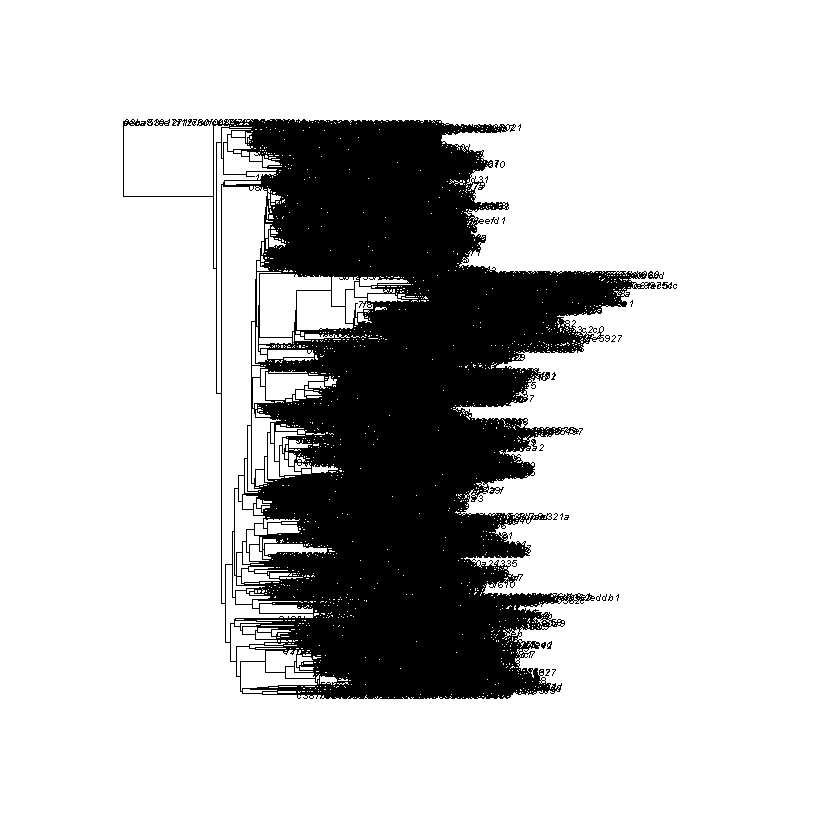

In [15]:
plot(phy_tree(phy), cex = 0.5)

## refseq<a class="anchor" id="seq"></a>
refseq contains the actual DNA sequences of our ASVs (or alternatively the reference sequences of OTUs). We can access it with the refseq() function.

In [16]:
refseq(phy)

DNAStringSet object of length 1310:
       width seq                                            names               
   [1]   237 TGGCGAGCGTTGTTCGGATTTA...CAGGGACGAAAGCATGGGGAG dc467f0f8b8aa389a...
   [2]   236 GTGCAAGCGTTAATCGGAATTA...GAAGCGCGAAAGCGTGGGTAG c387bc64fb22cd96d...
   [3]   236 TCGCAAGCGTTATCCGGATTTA...AAAGCGCGAAAGCGTGGGTAG 42a23e6f4764f572f...
   [4]   236 TCACAAGCGTTATCCGGATTTA...AAAGCGCGAAAGCGTGGGTAG 2ea17744c7eeab459...
   [5]   236 TCACGAGCGTTATCCGGATTTA...GAAGCGCGAAAGCGTGGGTAG 332ef16f5660bfe8e...
   ...   ... ...
[1306]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG f43c36b22c1bc8798...
[1307]   237 GGGCCAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG 7342bde0691e85a0a...
[1308]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG b2c5f0d55453383ac...
[1309]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG ab8cf03d7d5eb6d8a...
[1310]   237 GGGCAAGCGTTATCCGGATTTA...GAGGCTCGAAAGCGTGGGGAG e5e51d9940a3c4553...

Again, we can subset with the [ ] notation

In [17]:
refseq(phy)["6ec6d03fbef9f16e3581ccdc60e7d266"]

DNAStringSet object of length 1:
    width seq                                               names               
[1]   237 GTGCAAGCGTTATCCGGAATTAT...CTGAGGAGCGAAAGCGTGGGGAG 6ec6d03fbef9f16e3...

To see the entire sequence, convert it to a string ("character" in R jargon)

In [18]:
as.character(refseq(phy)[c("6ec6d03fbef9f16e3581ccdc60e7d266")])

6ec6d03fbef9f16e3581ccdc60e7d266 
"GTGCAAGCGTTATCCGGAATTATTGGGCGTAAAGGGCTCGTAGGCGGTTCGTCGCGTCCGGTGTGAAAGTCCATCGCTTAACGGTGGATCCGCGCCGGGTACGGGCGGGCTTGAGTGCGGTAGGGGAGACTGGAATTCCCGGTGTAACGGTGGAATGTGTAGATATCGGGAAGAACACCAATGGCGAAGGCAGGTCTCTGGGCCGTTACTGACGCTGAGGAGCGAAAGCGTGGGGAG"